dataset: [[1, 0, 0, -1], [1, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 1]]
Initial PLA with ws: [0, 0, 0], ys: [-1, 1, 1, 1]
---------------------------------------------
PLA with xs: [1, 0, 0], ws: [0, 0, 0], y: -1, output:  1
x_decision: [-0.5  1.5], y_decision: [0. 0.]
x_decision: [-0.5  1.5], y_decision: [0. 0.]


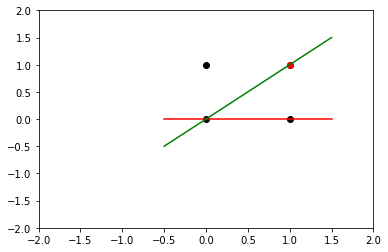

Learning: ws = [-1, 0, 0]
---------------------------------------------
PLA with xs: [1, 0, 0], ws: [-1, 0, 0], y: -1, output: -1
x_decision: [-0.5  1.5], y_decision: [1.e+09 1.e+09]
x_decision: [-0.5  1.5], y_decision: [1.e+09 1.e+09]


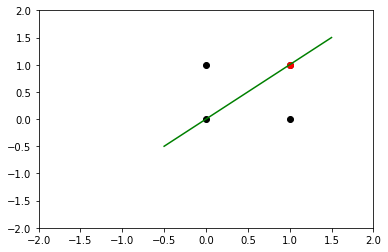

PLA with xs: [1, 0, 1], ws: [-1, 0, 0], y:  1, output: -1
x_decision: [-0.5  1.5], y_decision: [1.e+09 1.e+09]
x_decision: [-0.5  1.5], y_decision: [1.e+09 1.e+09]


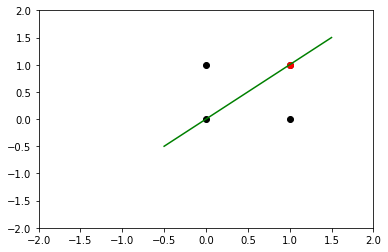

Learning: ws = [0, 0, 1]
---------------------------------------------
PLA with xs: [1, 0, 0], ws: [0, 0, 1], y: -1, output:  1
x_decision: [-0.5  1.5], y_decision: [0. 0.]
x_decision: [-0.5  1.5], y_decision: [0. 0.]


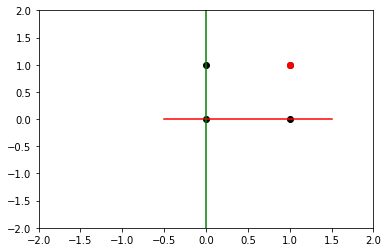

Learning: ws = [-1, 0, 1]
---------------------------------------------
PLA with xs: [1, 0, 0], ws: [-1, 0, 1], y: -1, output: -1
x_decision: [-0.5  1.5], y_decision: [1. 1.]
x_decision: [-0.5  1.5], y_decision: [1. 1.]


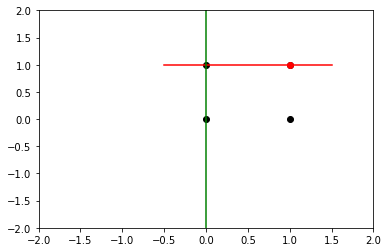

PLA with xs: [1, 0, 1], ws: [-1, 0, 1], y:  1, output:  1
x_decision: [-0.5  1.5], y_decision: [1. 1.]
x_decision: [-0.5  1.5], y_decision: [1. 1.]


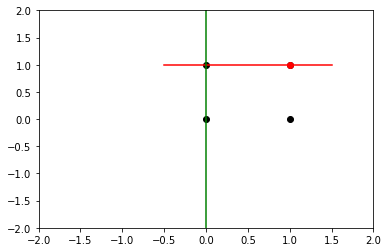

PLA with xs: [1, 1, 0], ws: [-1, 0, 1], y:  1, output: -1
x_decision: [-0.5  1.5], y_decision: [1. 1.]
x_decision: [-0.5  1.5], y_decision: [1. 1.]


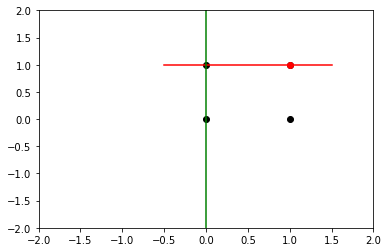

Learning: ws = [0, 1, 1]
---------------------------------------------
PLA with xs: [1, 0, 0], ws: [0, 1, 1], y: -1, output:  1
x_decision: [-0.5  1.5], y_decision: [ 0.5 -1.5]
x_decision: [-0.5  1.5], y_decision: [ 0.5 -1.5]


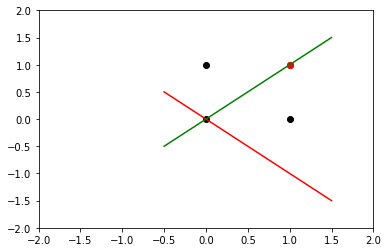

Learning: ws = [-1, 1, 1]
---------------------------------------------
PLA with xs: [1, 0, 0], ws: [-1, 1, 1], y: -1, output: -1
x_decision: [-0.5  1.5], y_decision: [ 1.5 -0.5]
x_decision: [-0.5  1.5], y_decision: [ 1.5 -0.5]


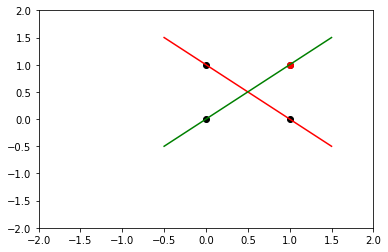

PLA with xs: [1, 0, 1], ws: [-1, 1, 1], y:  1, output:  1
x_decision: [-0.5  1.5], y_decision: [ 1.5 -0.5]
x_decision: [-0.5  1.5], y_decision: [ 1.5 -0.5]


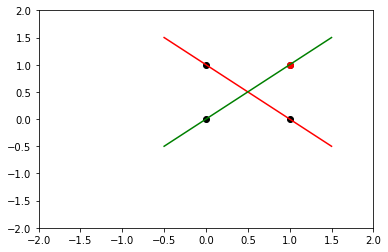

PLA with xs: [1, 1, 0], ws: [-1, 1, 1], y:  1, output:  1
x_decision: [-0.5  1.5], y_decision: [ 1.5 -0.5]
x_decision: [-0.5  1.5], y_decision: [ 1.5 -0.5]


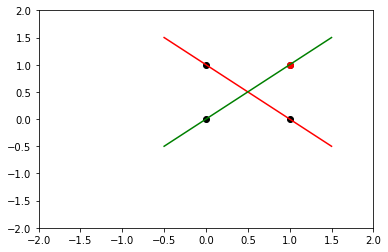

PLA with xs: [1, 1, 1], ws: [-1, 1, 1], y:  1, output:  1
x_decision: [-0.5  1.5], y_decision: [ 1.5 -0.5]
x_decision: [-0.5  1.5], y_decision: [ 1.5 -0.5]


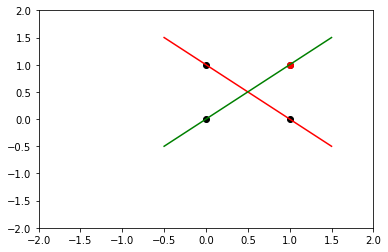

---------------------------------------------


[-1, 1, 1]

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


def vadd(vs, ws):
    return [a + b for a, b in zip(vs, ws)]
    
def vsubtract(vs, ws):
    return [a - b for a, b in zip(vs, ws)]
 
def scalar_multiply(c, vs):
    return [c * v for v in vs]

def dot(vs, ws):
    xs = [v * w for v, w in zip(vs, ws)]
    result = sum(xs)
    return result

# -------------------------------------------------

def activation_function(x):
    return sign(x)

def sign(x):
    if x >= 0: return 1
    else:      return -1
    
    
def proceptron_output(ws, xs):
    result = dot(ws, xs)
    result = activation_function(result)
    return result

# -------------------------------------------------

dataset = [[1, 0, 0,-1],
           [1, 0, 1, 1],
           [1, 1, 0, 1],
           [1, 1, 1, 1]
          ]


def pla(dataset):

    ws = [0, 0, 0]
    ys = [data[-1] for data in dataset]
    print('dataset: {}'.format(dataset))
    print('Initial PLA with ws: {}, ys: {}'.format(ws, ys))
    print('---------------------------------------------')
    
    
    outputs = []

    keep_going = True
    while keep_going:
        keep_going = False
        for data in dataset:
            xs = data[0:3]
            y = data[-1]
            output = proceptron_output(ws, xs)
            #outputs.append(output)
            
            
            print('PLA with xs: {}, ws: {}, y: {:2d}, output: {:2d}'.format(xs, ws, y, output))
            
            plt.plot([0, 0, 1, 1], [0, 1, 0, 1], 'o', color='black')
            plt.plot([1], [1], 'o', color='red')            

            a = ws[1]
            b = ws[2]
            c = ws[0]

            if b == 0: 
                b = 0.000000001
            # Direction Vector
            x_decision_boundary = np.array([-0.5, 1.5])
            y_decision_boundary = (-a/b) * x_decision_boundary + (-c/b)
            print('x_decision: {}, y_decision: {}'.format(x_decision_boundary, y_decision_boundary))
            plt.plot(x_decision_boundary, y_decision_boundary,'r')
            
            # Normal Vector
            if a == 0:
                a = 0.000000001
            x_decision_boundary_normal_vector = np.array([-0.5, 1.5])
            y_decision_boundary_normal_vector = (b/a) * x_decision_boundary_normal_vector
            print('x_decision: {}, y_decision: {}'.format(x_decision_boundary, y_decision_boundary))
            plt.plot(x_decision_boundary_normal_vector, y_decision_boundary_normal_vector,'g')
            
            plt.xlim(-2, 2)
            plt.ylim(-2, 2)
            plt.show()    
            
            if output != y:
                dw = scalar_multiply(y, xs)
                ws = vadd(ws, dw)
                
                print('Learning: ws = {}'.format(ws))
                keep_going = True
                break
        print('---------------------------------------------')
    
        
            
    return ws

pla(dataset)
    